# Übung 4

## Aufgabe 16
Erweitern Sie das logistische Regressionsmodell
$$M_1: Unfall∼Geschlecht+Beruf$$
für den Datensatz Unfaelle.txt um die Interaktion zwischen Geschlecht und
Beruf zum Modell
$$M_2: Unfall∼Geschlecht+Beruf+Geschlecht:Beruf$$
Die Interaktion von Geschlecht und Beruf sind zwei neue Variablen $GD_1$ und
$GD_2$, wobei $G$ die Dummy-Variable für Geschlecht und $D_1$, $D_1$ die Dummy-
Variablen für die Berufe Physiker und Zahnarzt sind. Benutzen Sie das Modell, um die Odds für einen Unfall der verschiedenen Berufe getrennt nach
Geschlecht zu schätzen. Welche inhaltliche Bedeutung hat die Interaktion zwischen Geschlecht und Beruf? Ist die Interaktion signifikant auf dem 5% Niveau?
Führen Sie für die Interaktion den Likelihood-Ratio-Test durch.

In [1]:
unfaelle <- read.csv(file = "../Uebung 3/Unfaelle.txt", sep=" ")
head(unfaelle)

,Lnr,Unfall,Geschlecht,Beruf,Alter,Fahrpraxis
,<int>,<int>,<chr>,<chr>,<int>,<int>
1,1,0,Mann,Physiker,31,12
2,2,0,Frau,Physiker,37,18
3,3,0,Frau,Physiker,38,18
4,4,0,Frau,Physiker,44,25
5,5,0,Frau,Physiker,52,33
6,6,0,Mann,Physiker,41,22


Zur Veranschaulichung das Modell $M_1$

In [2]:
Geschlecht_factor <- as.factor(unfaelle$Geschlecht)
Beruf_factor <- as.factor(unfaelle$Beruf)

model_base <- glm(Unfall ~ Geschlecht_factor + Beruf_factor, data=unfaelle, family=binomial)
coef(model_base)

(Intercept) Geschlecht_factorMann  Beruf_factorPhysiker 
           -3.0902793            -0.7936064            -0.4364080 
 Beruf_factorZahnarzt 
            0.7863344

Und $M_2$

In [3]:
model_extended <- glm(Unfall ~ Geschlecht_factor + Beruf_factor + Geschlecht_factor : Beruf_factor, data=unfaelle, family=binomial)
coef(model_extended)

(Intercept) 
                                -3.1581196 
                     Geschlecht_factorMann 
                                -0.5199877 
                      Beruf_factorPhysiker 
                                -0.3330260 
                      Beruf_factorZahnarzt 
                                 0.8944644 
Geschlecht_factorMann:Beruf_factorPhysiker 
                                -0.4196834 
Geschlecht_factorMann:Beruf_factorZahnarzt 
                                -0.4352328

**Odds:**

Allgemein gilt:
$$
\log \frac{1}{1-p} = \beta_0 + \beta_1 \text{Mann} + ... \Rightarrow \frac{1}{1-p} = exp(\beta_0 + \beta_1 \text{Mann} + ...)
$$

Also müssen wir die Exponentialfunktion auf die jeweiligen Koeffizienten anwenden

In [4]:
coefficients <- coef(model_extended)

beta0 <- coefficients[1]
beta1 <- coefficients[2] # GeschlechtMann
beta2 <- coefficients[3] # BerufPhysiker
beta3 <- coefficients[4] # BerufZahnarzt
beta4 <- coefficients[5] # GeschlechtMann:BerufPhysiker (zusätzliches Risiko, falls ein Mann Physiker ist, im Vergleich zu einer Frau)
beta5 <- coefficients[6] # GeschlechtMann:BerufZahnarzt (analog)

logit_mann_bio <- beta0 + beta1
logit_mann_phys <- beta0 + beta1 + beta4
logit_mann_zahn <- beta0 + beta1 + beta5
logit_frau_bio <- beta0
logit_frau_phys <- beta0 + beta2
logit_frau_zahn <- beta0 + beta3

odds_mann_bio <- exp(logit_mann_bio)
odds_mann_phys <- exp(logit_mann_phys)
odds_mann_zahn <- exp(logit_mann_zahn)
odds_frau_bio <- exp(logit_frau_bio)
odds_frau_phys <- exp(logit_frau_phys)
odds_frau_zahn <- exp(logit_frau_zahn)

cat("Biologe: ", odds_mann_bio, "\nPhysiker: ", odds_mann_phys, "\nZahnarzt: ", odds_mann_zahn, "\nBiologin: ", odds_frau_bio, "\nPhysikerin", odds_frau_phys, "\nZahnärztin: ", odds_frau_zahn)

Biologe:  0.02527076 
Physiker:  0.01660933 
Zahnarzt:  0.01635306 
Biologin:  0.04250559 
Physikerin 0.03046595 
Zahnärztin:  0.1039698

Die Interaktion zwischen Geschlecht und Beruf:

In [5]:
summary(model_extended)


Call:
glm(formula = Unfall ~ Geschlecht_factor + Beruf_factor + Geschlecht_factor:Beruf_factor, 
    family = binomial, data = unfaelle)

Coefficients:
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                                 -3.1581     0.1656 -19.067  < 2e-16
Geschlecht_factorMann                       -0.5200     0.3173  -1.639    0.101
Beruf_factorPhysiker                        -0.3330     0.2967  -1.122    0.262
Beruf_factorZahnarzt                         0.8945     0.2180   4.104 4.06e-05
Geschlecht_factorMann:Beruf_factorPhysiker  -0.4197     0.6030  -0.696    0.486
Geschlecht_factorMann:Beruf_factorZahnarzt  -0.4352     0.4310  -1.010    0.313
                                              
(Intercept)                                ***
Geschlecht_factorMann                         
Beruf_factorPhysiker                          
Beruf_factorZahnarzt                       ***
Geschlecht_factorMann:Beruf_factorPhysiker    
Gesch

In diesem Fall bedeuten:
- **Geschlecht_factorMann:Beruf_factorPhysiker ($\beta_4$)** Die Veränderung der Log-Odds eines Unfalls für Männer, die Physiker sind, im Vergleich zu Frauen, die Physiker sind, zusätzlich zu allen anderen Faktoren
- **Geschlecht_factorMann:Beruf_factorZahnarzt ($\beta_5$)** Die Veränderung der Log-Odds eines Unfalls für Männer, die Zahnärzte sind, im Vergleich zu Frauen, die Zahnärzte sind, zusätzlich zu allen anderen Faktoren

In der Tabelle sind zusätzlich unter `Pr(>|z|)` die jeweiligen p-Werte zu finden.

Bei $\beta_4$ findet sich ein p-Wert von $0.486$. Das bedeutet, dass wir die Nullhypothese nicht ablehnen. Anders gesagt: Der Unterschied der Log-Odds eines Unfalls zwischen Physikern und Physikerinnen ist **nicht** groß genug, um statistisch signifikant zu sein.

Bei $beta_5$ ist der p-Wert ebenfalls weit über die $5\%$-Grenze, weswegen wir bei Zahnärzten ebenfalls keinen signifikanten Unterschied beobachten können.

Als letztes führen wir den Likelihood-Ratio-Test durch:

In [6]:
lrtest_result <- anova(model_base, model_extended, test = "LRT")
print(lrtest_result)

Analysis of Deviance Table

Model 1: Unfall ~ Geschlecht_factor + Beruf_factor
Model 2: Unfall ~ Geschlecht_factor + Beruf_factor + Geschlecht_factor:Beruf_factor
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)
1      3496     1157.8                     
2      3494     1156.7  2   1.1118   0.5736


Der p-Wert ist **nicht** signifikant ($<5\%$), also ist unser erweitertes Model $M_2$ nicht besser als unser Ausgangsmodell $M_1$, um die Log-Odds eines Unfalls zu schätzen.

## Aufgabe 17

Betrachten Sie die Kaplan-Meier Kurve für folgende Überlebensdaten

| PatNr. | Zeit | Status |
| --- | --- | --- |
| 1 | 7,0 | 1 |
| 2 | 8,0 | 1 |
| 3 | 5,0 | 1 |
| 4 | 9,0 | 1 |
| 5 | 1,0 | 0 |
| 6 | 1,0 | 0 |
| 7 | 5,6 | 1 |
| 8 | 8,0 | 1 |
| 9 | 8,0 | 0 |
| 10 | 1,3 | 1 |
| 11 | 5,0 | 1 |
| 12 | 10,0 | 1 |

**A:** Geben Sie die Zeitpunkte an, an denen die Kaplan-Meier Kurve Stufen
hat.

In [22]:
library(survival)

data <- data.frame(
    patnr = c(1,2,3,4,5,6,7,8,9,10,11,12),
    time = c(7,8,5,9,1,1,5.6,8,8,1.3,5,10),
    status = c(1,1,1,1,0,0,1,1,0,1,1,1)
)

km_plot <- survfit(Surv(time, status) ~ 1, data=data)

summary(km_plot)

Call: survfit(formula = Surv(time, status) ~ 1, data = data)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  1.3     10       1     0.90  0.0949        0.732        1.000
  5.0      9       2     0.70  0.1449        0.467        1.000
  5.6      7       1     0.60  0.1549        0.362        0.995
  7.0      6       1     0.50  0.1581        0.269        0.929
  8.0      5       2     0.30  0.1449        0.116        0.773
  9.0      2       1     0.15  0.1285        0.028        0.804
 10.0      1       1     0.00     NaN           NA           NA

Zeitpunkte der Stufen

In [8]:
event_times <- km_plot$time[km_plot$n.event > 0]
number_of_events <- km_plot$n.event[km_plot$n.event > 0]

jumps <- data.frame(Time = event_times, Events = number_of_events)

print(jumps)

  Time Events
1  1.3      1
2  5.0      2
3  5.6      1
4  7.0      1
5  8.0      2
6  9.0      1
7 10.0      1


**B:** Geben Sie für jede Stufe die Anzahl der Patienten an, die unmittelbar
vor der Stufe noch unter Risiko stehen.

Mit R: Die n.risk Spalte

In [27]:
event_times <- km_plot$time
number_of_events <- km_plot$n.event
number_at_risk <- km_plot$n.risk

print(number_at_risk)

[1] 12 10  9  7  6  5  2  1


**C:** Berechnen Sie die relativen Stufenhöhen.

In [25]:
relative_step_heights <- (number_at_risk - number_of_events) / number_at_risk
print(relative_step_heights)

[1] 1.0000000 0.9000000 0.7777778 0.8571429 0.8333333 0.6000000 0.5000000
[8] 0.0000000


**D:** Berechnen Sie die absoluten Stufenhöhen.

In [32]:
print(km_plot$surv)

[1] 1.00 0.90 0.70 0.60 0.50 0.30 0.15 0.00


## Aufgabe 18
Stellen Sie die Kaplan-Meier Kurve für die Daten aus der vorigen
Aufgabe mit R in einem Diagramm dar. Berechnen Sie aus der Kaplan-Meier
Kurve die mediane Ereigniszeit: Welche Bedeutung hat die mediane Ereigniszeit? Ergänzen Sie das Diagramm um eine horizontale Linie bei 0,5 und eine
vertikale Linie bei der medianen Ereigniszeit.

*Hinweis:* Laden Sie mit library(survival) das R-Paket survival und erstellen Sie mit der Funktion Surv ein Survival Objekt. Mit der Funktion plot
erstellen Sie die Kaplan-Meier Kurve. Die Funktion abline zeichnet in ein
schon vorhandenes Diagramm Linien ein. Mit der Funktion summary erhalten
Sie Informationen über das Survival Objekt.

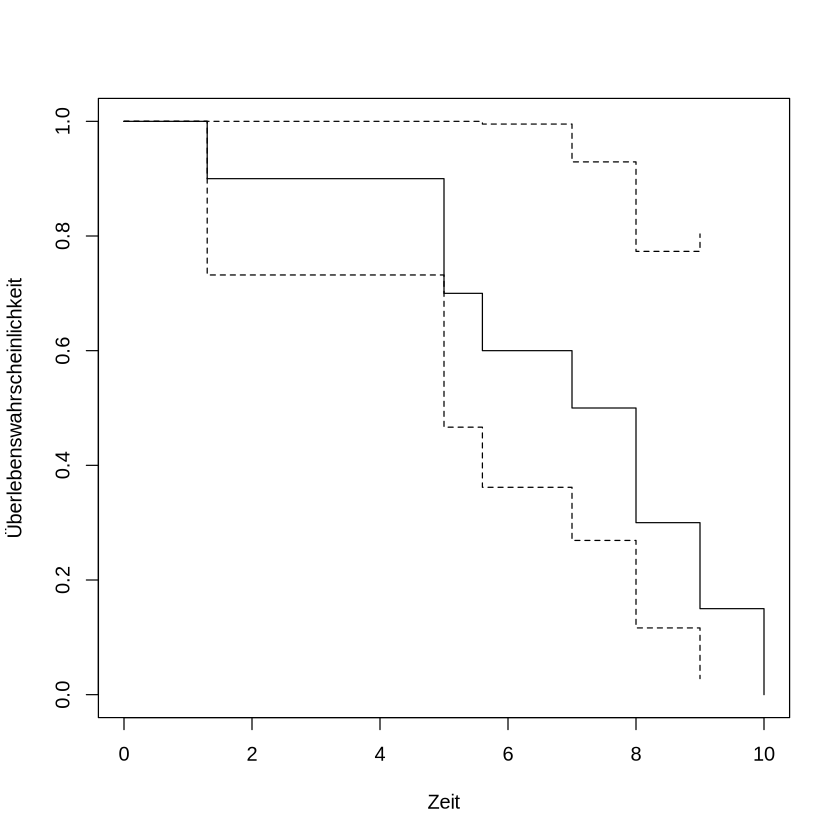

In [12]:
plot(km_plot, xlab = "Zeit", ylab = "Überlebenswahrscheinlichkeit")

Mediane Ereigniszeit: Zeit, zu der die Überlebenswahrscheinlichkeit $50\%$ beträgt

In [13]:
median_time <- summary(km_plot)$table["median"]

print(median_time)

median 
   7.5 


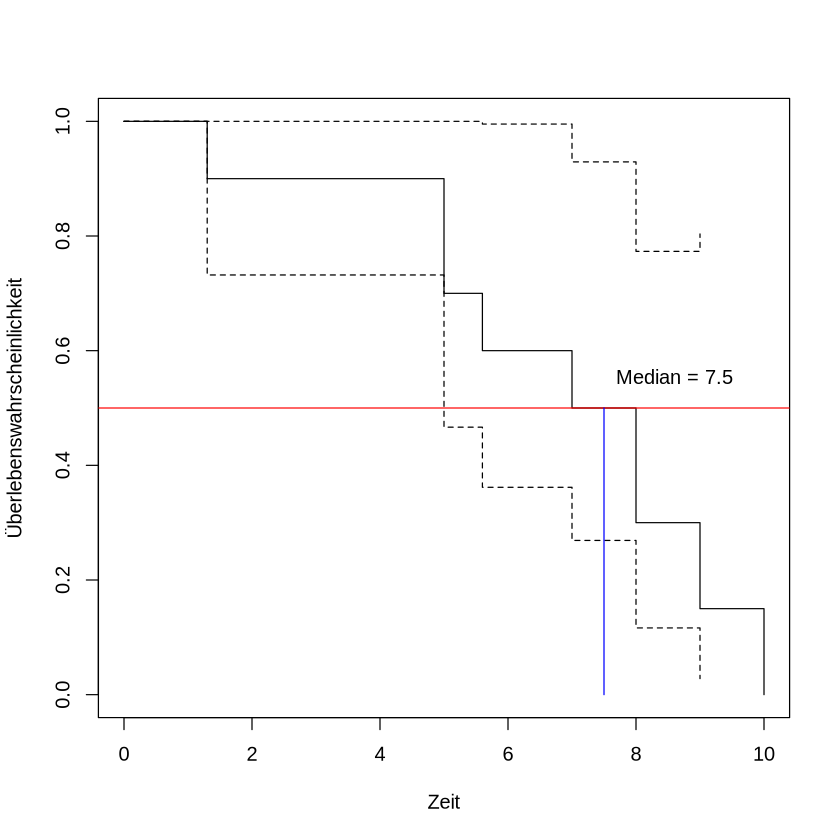

In [14]:
plot(km_plot, xlab = "Zeit", ylab = "Überlebenswahrscheinlichkeit")

abline(h = 0.5, col = "red", lty = 1)

segments(x0 = median_time, y0 = 0, x1 = median_time, y1 = 0.5, col = "blue", lty = 1)

text(median_time, 0.55, paste("Median =", round(median_time, 2)), pos = 4)

## Aufgabe 19

Laden Sie die Daten in `ZeitBisUnfall.txt` in einen R-Datensatz.
In dieser Datei befindet sich die Variable Zeit, welche im Falle eines Unfalls
die Zeit in Monaten bis zum ersten Unfall angibt und sonst die Länge der
unfallsfreien Zeit.

In [15]:
zeitbisunfall <- read.csv(file="ZeitBisUnfall.txt", sep=" ")
head(zeitbisunfall)

,Lnr,Unfall,Geschlecht,Beruf,Alter,Fahrpraxis,Zeit
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,1,0,Mann,Physiker,31,12,5
2,2,0,Frau,Physiker,37,18,15
3,3,0,Frau,Physiker,38,18,7
4,4,0,Frau,Physiker,44,25,64
5,5,0,Frau,Physiker,52,33,19
6,6,0,Mann,Physiker,41,22,70


**A:** Stellen Sie für Männer und Frauen die Zeit (Monate) bis zu einem Unfall in zwei Kaplan-Meier Kurven in einem gemeinsamen Diagramm dar.
Vergeben Sie für die Kaplan-Meier Kurven für Männer und Frauen unterschiedliche Farben und fügen Sie dem Diagramm eine Legende bei.

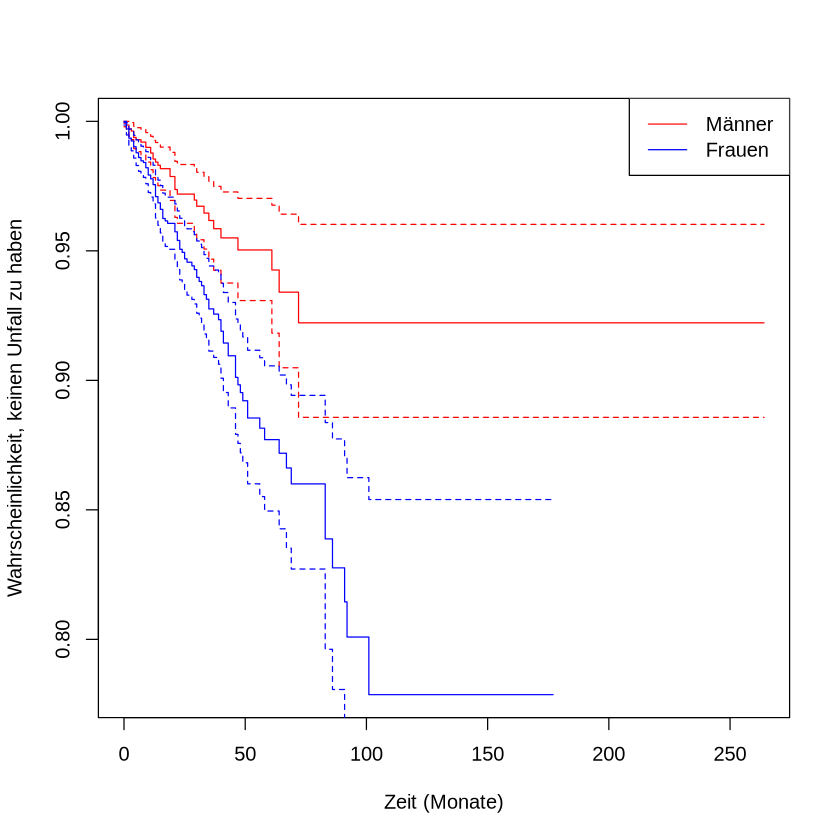

In [16]:
zbu_male <- zeitbisunfall[zeitbisunfall$Geschlecht == "Mann", ]
zbu_female <- zeitbisunfall[zeitbisunfall$Geschlecht == "Frau", ]

km_plot_m <- survfit(Surv(Zeit, Unfall) ~ 1, data=zbu_male)
km_plot_f <- survfit(Surv(Zeit, Unfall) ~ 1, data=zbu_female)

ylim <- min(min(km_plot_m$surv), min(km_plot_f$surv))

plot(km_plot_m, xlab = "Zeit (Monate)", col="red", ylab = "Wahrscheinlichkeit, keinen Unfall zu haben", lty=1, ylim=c(ylim, 1))
lines(km_plot_f, lty=1, col="blue")

legend("topright", 
       c("Männer", "Frauen"), 
       lty = 1, 
       col = c("red", "blue"), 
       box.lty = 1, 
       bty = "b")

**B:** Warum kann weder für Frauen noch für Männer die mediane Zeit bis zu
einem Unfall berechnet werden?

Weil die y-Achse (Wahrscheinlichkeit, keinen Unfall zu haben) zu keinem Zeitpunkt $50\%$ erreicht. Es gibt also keinen Schnittpunkt.

**C:** Vergleichen Sie die beiden Kaplan-Meier Kurven mit dem Log-Rank Test:
- Formulieren Sie die Nullhypothese, die der Log-Rank Test prüft.

Die Verteilung Unfallswahrscheinlichkeit ist für Männer und Frauen identisch.
- Welche Voraussetzung muss für den Log-Rank Test erfüllt sein?

**Unabhängigkeit:** Die Überlebenszeiten der Individuen in jeder Gruppe sind unabhängig voneinander.

**Die Überlebenswahrscheinlichkeiten ändern sich im Laufe der Zeit nicht:** Die Überlebensverteilungen variieren nicht signifikant über die Zeit.

**Non-Informative Censoring:** Die Zensierung sollte weder mit dem untersuchten Ereignis noch mit der Gruppenzuordnung zusammenhängen.
- Geben Sie den p-Wert des Log-Rank Tests an.

In [17]:
log_rank_test <- survdiff(Surv(Zeit, Unfall) ~ Geschlecht, data=zeitbisunfall)

print(log_rank_test)
cat("p-Wert: ", log_rank_test$pvalue)

Call:
survdiff(formula = Surv(Zeit, Unfall) ~ Geschlecht, data = zeitbisunfall)

                   N Observed Expected (O-E)^2/E (O-E)^2/V
Geschlecht=Frau 2091      110     87.3      5.88      14.8
Geschlecht=Mann 1409       35     57.7      8.91      14.8

 Chisq= 14.8  on 1 degrees of freedom, p= 1e-04 
p-Wert:  0.0001179918

- Kann die Nullhypothese auf dem Signifikanzniveau von $α = 0.05$ abgelehnt werden?

Ja, da der p-Wert $<0.5\%$

## Aufgabe 20
Laden Sie die Daten in ZeitBisUnfall.txt in einen R-Datensatz.
Berechnen Sie für die Zeit (Monate) bis zu einem Unfall ein Cox-Modell mit unabhängigen Variablen Alter, Geschlecht und der Interaktion zwischen Alter und Geschlecht. Die Interaktion zwischen Alter und Geschlecht ist das
Produkt der Variable Alter mit der Dummy-Variable für Geschlecht. Wie
viele Parameter hat dieses Cox-Modell? Warum haben Cox-Modelle keinen
Intercept? Welche Hazard-Ratios stellen die exponierten Parameterschätzer
$$exp( \hat{β_i}), i = 1, . . . , p$$ dar?
Hinweis: Berechnen Sie das Cox-Modell mit der Funktion `coxph`

In [19]:
# Nicht unbedingt notwendig in R, aber der Klarheit halber trotzdem:
Geschlecht_factor <- as.factor(zeitbisunfall$Geschlecht)

zbu_cox <- coxph(Surv(Zeit, Unfall) ~ Alter + Geschlecht_factor + Alter * Geschlecht_factor, data=zeitbisunfall)
print(zbu_cox)

Call:
coxph(formula = Surv(Zeit, Unfall) ~ Alter + Geschlecht_factor + 
    Alter * Geschlecht_factor, data = zeitbisunfall)

                                coef exp(coef) se(coef)       z      p
Alter                       -0.24744   0.78080  0.01826 -13.551 <2e-16
Geschlecht_factorMann        1.36294   3.90768  1.33887   1.018  0.309
Alter:Geschlecht_factorMann -0.06642   0.93574  0.04445  -1.494  0.135

Likelihood ratio test=462.7  on 3 df, p=< 2.2e-16
n= 3500, number of events= 145 


Anzahl von Parametern: 3

Cox-Modelle haben kein Intercept, weil sie ausschließlich die Diskrepanz zwischen 2 Gruppen betrachten, anstatt wie bei einem glm eine
Grundanzahl an Ereignissen mit einzubeziehen.

Die Hazard-Ratios stellen dar, um wie viel das Risiko eines Unfalls sich verändert, z.B.: Ändert sich das Alter um +1, so ändert sich das Risiko eines Unfalls um einen Faktor von $0.78080$, also $0.2192\%$, bzw. bei Männern steigt das Risiko eines Unfalls um einen Faktor von $3.90768$.